## Chart Customisation

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Line Chart

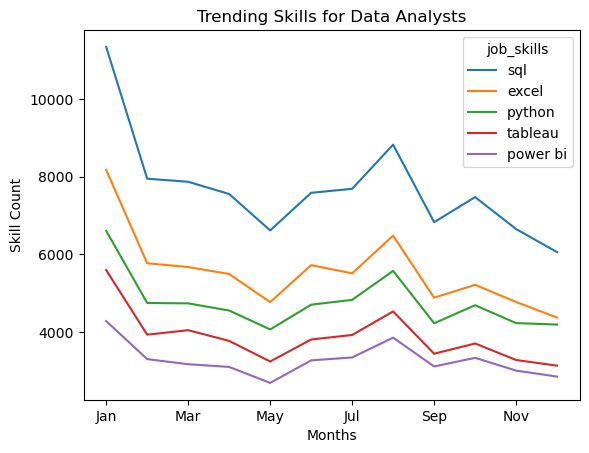

In [2]:
# create new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# explode job_skills column
df_DA_exploded = df_DA.explode('job_skills')

# pivot and use fill_value to replace NaN with value of own choosing
df_DA_pivot = df_DA_exploded.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

# sums amount of times a skills is required throughout the year
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# sort skills by count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

# get top 5 skills
df_DA_pivot.iloc[:, :5].plot()

plt.xlabel('Months')
plt.ylabel('Skill Count')
plt.title('Trending Skills for Data Analysts')
plt.show()

### Updated Visuals

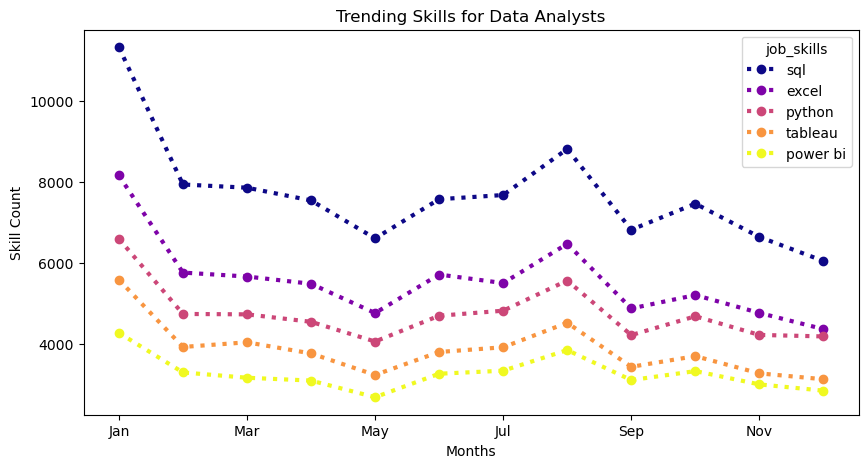

In [3]:
# get top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 3,
    linestyle = ':', # options: '-', '--', '-.', ':'
    colormap = 'plasma', # options: viridus, plasma, inferno, magma, cividis
    markersize = 6,
    marker = 'o', # options: o, x, +, *, s, ',', '.', 1, 2, 3, 4, ...
    figsize = (10, 5)

)

plt.xlabel('Months')
plt.ylabel('Skill Count')
plt.title('Trending Skills for Data Analysts')
plt.show()

## Scatter Plot

In [4]:
# explode job_skills into individual rows
df_exploded = df_DA.explode('job_skills')

# calculate avg salary and count job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

# limit skills to top skills
skill_count = 20
skill_stats = skill_stats.sort_values('skill_count', ascending = False).head(skill_count)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


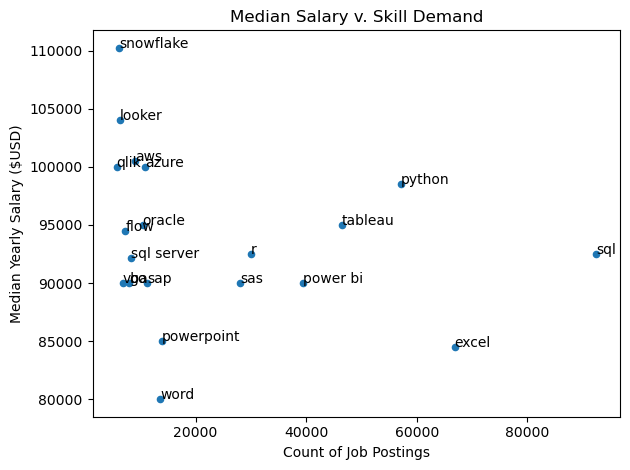

In [5]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')

plt.title('Median Salary v. Skill Demand')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

# plots labels for dots on scatter plot
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()

### Updated Visuals

In [6]:
from adjustText import adjust_text

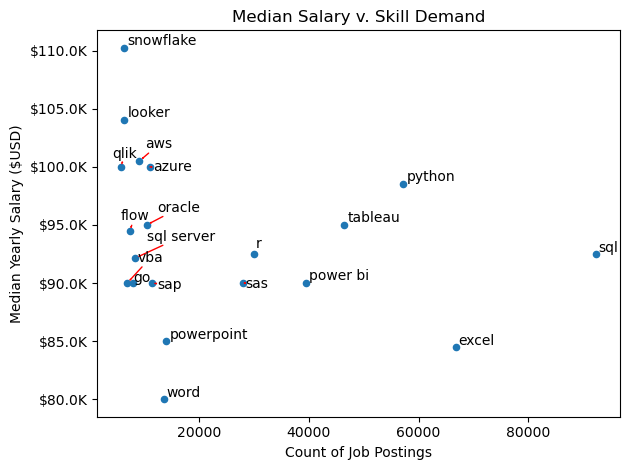

In [17]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')

# plots labels for dots on scatter plot
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = 'r', lw = 1))

# fig, ax = plt.subplots()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}K'))

plt.title('Median Salary v. Skill Demand')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

plt.show()